## Questão 1
**R** - Como pedido na questão, foi feita uma discretização de um sinal senoidal e periodico com 3,5,10 e 50 amostras por ciclo. Rodando o codigo abaixo é possivel observar nos graficos que quanto maior o numero de amostras maior é a aproximação do sinal continuo. com 50 amostras para esse sinal especifico já é possivel identificar qual a função que modela ele. Porém com 3 ou 5 não da pra ter uma noção qual função esse grafico está discretizando.

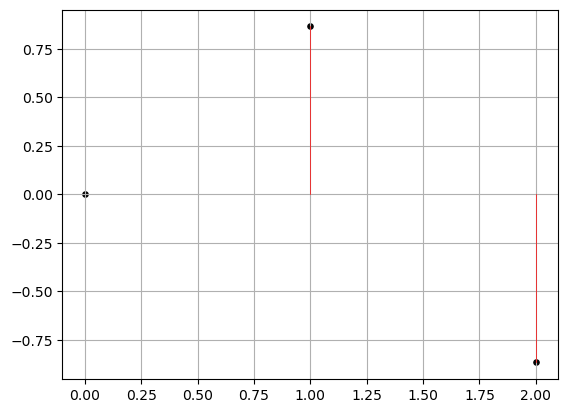

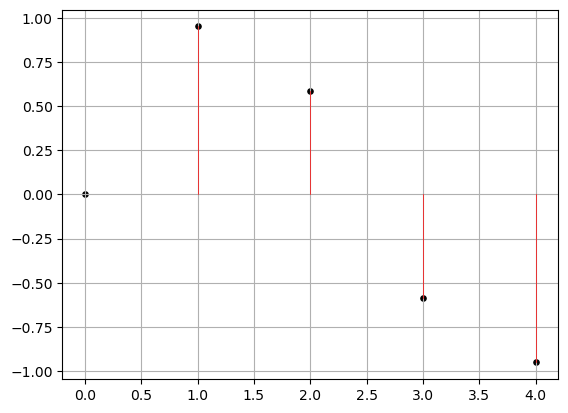

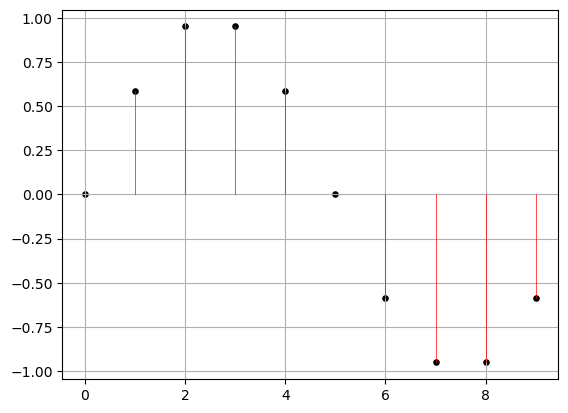

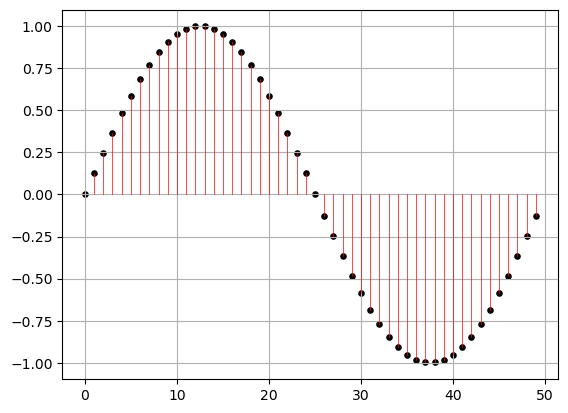

In [54]:
from math import sin,pi
import matplotlib.pyplot as plt

val_amostras = [3,5,10,50]
y=[]
for amostra in val_amostras:
    for n in range(amostra):
        y.append(sin(2*pi*n/amostra))
        
    plt.scatter([range(len(y))],y, s=14,color='#000')
    plt.grid(True)
    for i in range(len(y)):
        plt.plot([i, i], [y[i], 0], color='r', linewidth=0.5)
    plt.show()
    y.clear()

## 2ª Questão

**R** - A forma expandida da equação fica:
$$
\ C = x + i\cdot y
$$
$$
\ a = x_a + i\cdot y_a
$$
$$
\ C\cdot \exp(a \cdot n) = \exp(x_a \cdot n) \cdot [x \cdot \cos(y_a \cdot n) + x \cdot i \cdot \sin(y_a \cdot n) + y \cdot i \cdot \cos(y_a \cdot n) - y \cdot \sin(y_a \cdot n)]
$$

Logo, é possível observar que para o sinal ser puramente exponencial basta colocar $y_a = 0$. Para um sinal apenas senoidal colocaremos $x_a = 0$. E para um sinal amortecido $y_a$ &ne; 0 e $x_a$ &ne; 0. 

Importante resaltar que quanto maior o numero de amostras, menor tem que os valores de a para poder observa seu comportamento graficamente. Outro ponto importante é que a variavel C implica na amplitude de ambos os sinais. (Real e imaginario)


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


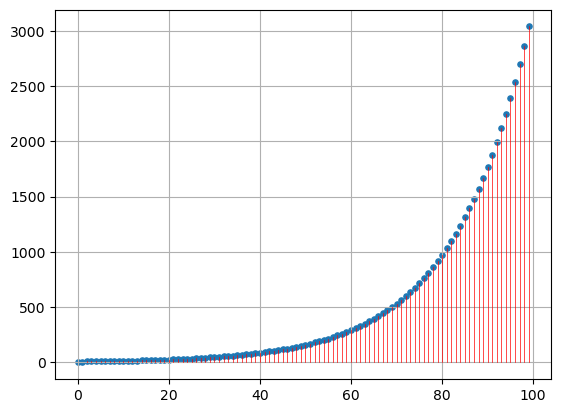

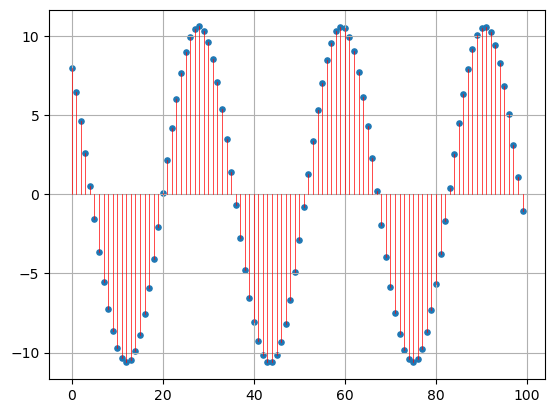

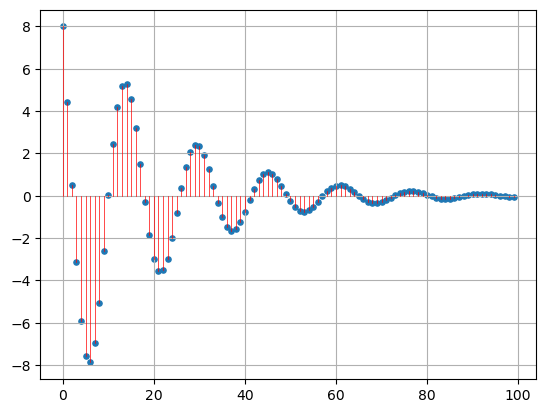

In [45]:
import numpy as np
C = complex(8,7)
a_exp = complex(.06,0)
a_osc = complex(0,.2)
a_amortecido = complex(-.05,.4)

v_abc = [(C,a_exp),(C,a_osc),(C,a_amortecido)]

y=[]
num_de_amostras = 100
for tuple in v_abc:
    C,a = tuple
    for n in range(num_de_amostras):
        y.append(C* np.exp(a*n))
    plt.scatter(range(len(y)),np.real(y), s=14)
    for i in range(len(y)):
        plt.plot([i, i], [y[i], 0], color='r', linewidth=0.5)
    plt.grid(True)
    plt.show()
    y.clear()

## Questão 3

**R** - Para demonstrar a propriedade dos sinais discretos de que o valor de $W_0$(frenquencia) não implica diretamente em uma alta frequencia escolhi valores de w = [(2/10)* &pi;,  &pi;, 2* &pi;].

/usr/lib/python3/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


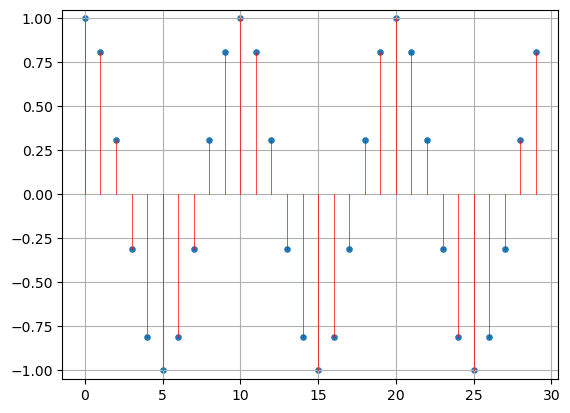

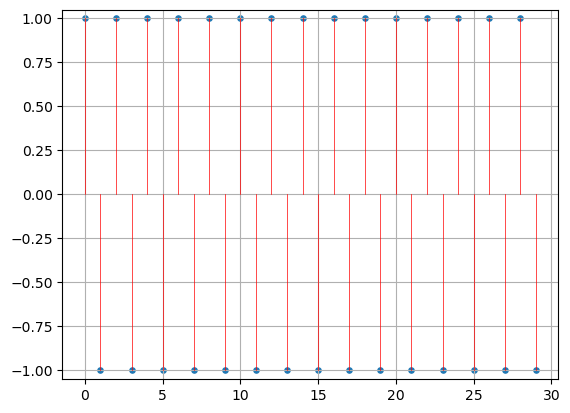

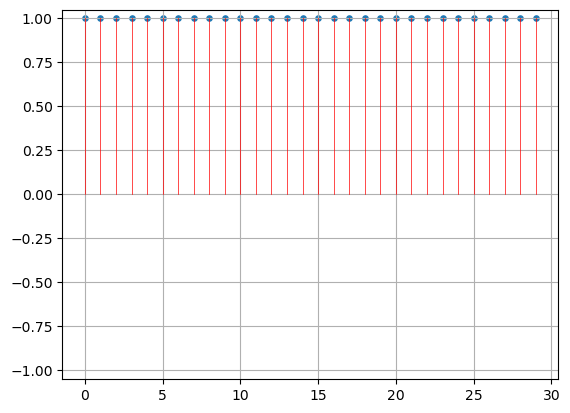

In [46]:
frequencias_w = [.2*pi, pi, 2*pi]
amostras = 30
j = complex(0,1)
for w in frequencias_w:
    for n in range(amostras):
        y.append(np.exp(j*w*n))
    plt.scatter(range(len(np.real(y))),y, s=14)
    plt.ylim(-1.05,1.05)
    for i in range(len(y)):
        plt.plot([i, i], [y[i], 0], color='r', linewidth=0.5)
    plt.grid(True)
    plt.show()
    y.clear()

## 4ª Questão

**R** - Primeiro criei as funções que geram os sinais de impulso(*impulso_unit_idpnt*) e degrau(*degrau_unit_idpnt*) independentes. Em seguida criei as funções que fazer a transformada inversa de sinais de impulso para degrau e vice-versa. (*degrau_from_impulso*) e (*degrau_from_impulso*). Por último, criei a função que gera uma onda a partir de um impulso que recebe como parametros o sinal impulso, o numero de passos e o delay.

[0. 0. 0. 0. 1. 1. 0. 0. 0.]


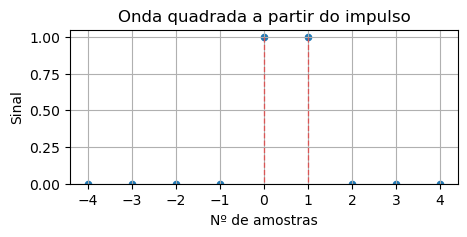

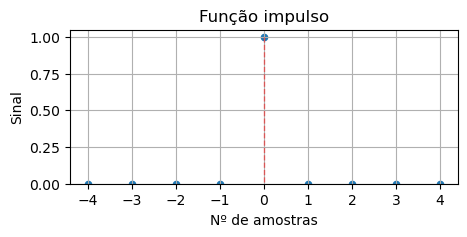

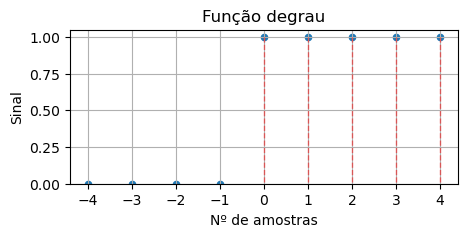

In [49]:

def impulso_unit_idpnt(n_amostras):
    y = [1 if index == 0 else 0 for index in range(-n_amostras//2 + 1,n_amostras//2)]
    return y

def degrau_unit_idpnt(n_amostras):
    y = [1 if index >= 0 else 0 for index in range(-n_amostras//2 + 1,n_amostras//2)]
    return y

def degrau_from_impulso(impulso):
    s = 0
    y = []
    for elem in impulso:
        s += elem
        y.append(s)
    return y

def impulso_from_degrau(degrau):
    #função equivalente a:
    # np.diff(degrau)
    mem=0
    s_diff=0
    diff= 0
    y=[]
    for elem in degrau:
        diff=elem-mem
        s_diff+=diff
        mem=elem
        y.append(diff)

    return y

def onda_from_impulso(impulso,passos, delay):
    onda = np.zeros(len(impulso))
    for i in range(len(impulso)):
        if impulso[i] == 1: onda[i+delay:i+passos+delay]=passos*[1]
    print(onda)
    return onda


n_amostras = 10
x = [index for index in range(-n_amostras//2 + 1,n_amostras//2)]
y_degrau = degrau_unit_idpnt(n_amostras)
y_impulso = impulso_from_degrau(y_degrau)
onda = onda_from_impulso(y_impulso, 2, 0)
x_onda = [index for index in range(-n_amostras//2 + 1,-n_amostras//2 + len(onda)-len(x))]

#Area de Plot gráfico
plt.figure(figsize=(5,2))
plt.scatter(x,onda, s=20)
plt.title('Onda quadrada a partir do impulso')
plt.ylabel('Sinal')
plt.xlabel('Nº de amostras')
plt.ylim(0,1.05)
for i in range(len(x)):
    plt.plot([x[i], x[i]], [onda[i], 0], color='r', linewidth=1, linestyle='--', alpha=0.5)
plt.grid(True)
plt.show()

plt.figure(figsize=(5,2))
plt.scatter(x,y_impulso, s=20)
plt.title('Função impulso')
plt.ylabel('Sinal')
plt.xlabel('Nº de amostras')
plt.ylim(0,1.05)
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y_impulso[i], 0], color='r', linewidth=1, linestyle='--', alpha=0.5)
plt.grid(True)
plt.show()

plt.figure(figsize=(5,2))
plt.scatter(x,y_degrau, s=20)
plt.title('Função degrau')
plt.ylabel('Sinal')
plt.xlabel('Nº de amostras')
plt.ylim(0,1.05)
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y_degrau[i], 0], color='r', linewidth=1, linestyle='--', alpha=0.5)
plt.grid(True)
plt.show()

## 5ª Questão

**R** - Após executar o bloco de codigo abaixo seguindo os items da 5ª questão fazendo as alterações de cada item, temos os resultados visto na tabela. Para ficar de facil observação coloquei valores fixos para mover a imagem nos items c,d,e. Para os items a, b, c, conseguimos ver a inversão de varias formas.

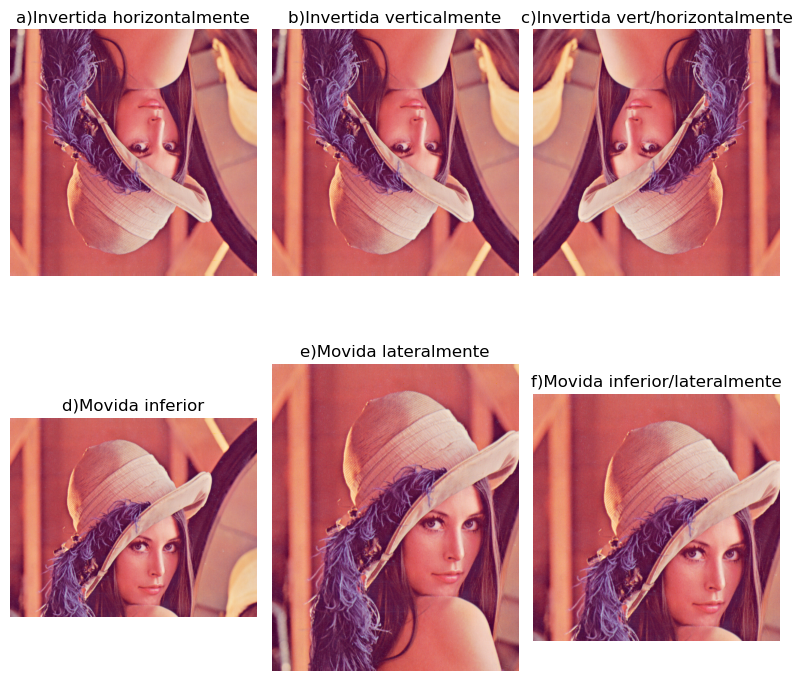

In [48]:
from PIL import Image
import numpy as np

imagem = Image.open('./Lenna.png')
imagem_v = np.array(imagem)

v_size = len(imagem_v)


imgs = [('a)Invertida horizontalmente',imagem_v[::][::-1] ),
        ('b)Invertida verticalmente',imagem_v[::-1][ :] ),
        ('c)Invertida vert/horizontalmente',imagem_v[::-1, ::-1] ),
        ('d)Movida inferior',imagem_v[:v_size-100, ::] ),
        ('e)Movida lateralmente',imagem_v[:, :v_size-100] ),
        ('f)Movida inferior/lateralmente',imagem_v[:v_size-100, :v_size-100] ),]

fig, axes = plt.subplots(2,3, figsize=(8, 8))

for i, ax in enumerate(axes.ravel()):
    ax.imshow(np.array(imgs[i][1]))  
    ax.set_title(imgs[i][0])
    ax.axis('off')  

plt.tight_layout()

plt.show()
